# **Title of Project : - Hill and Valley Prediction using Logistic Regression**

## **Objective**

Each record represent 100 points on a two-dimensional graph. When plotted in order(from 1 through 100) as the Y coordinate, the points will create either a Hill(a "bump in the terrain") or a valley(a "dip" in the terrain). See the original source for some example of these graphs.
1-100: labeled "V##". Floating point values(numeric), the X-values.
101: labeled "Class". Binary{0,1} representing{valley, hill}

## **Data Source**

https://github.com/YBI-Foundation/Dataset/blob/main/Hill%20Valley%20Dataset.csv

## **Import Library**

In [1]:
import pandas as pd # for data manipulation
import numpy as np # for mathametical
import matplotlib.pyplot as plt # for visualization

## **Import Data**

In [2]:
df = pd.read_csv("Hill Valley Dataset.csv")

In [40]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


## **Describe Data**

In [4]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [6]:
print(df.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'Class']


In [7]:
df.shape

(1212, 101)

In [8]:
df['Class'].value_counts()

Class
0    606
1    606
Name: count, dtype: int64

In [9]:
df.groupby('Class').mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002095B654AF0>>

## **Define Target Variable (y) and Feature Variables (X)**

In [10]:
y = df['Class']

In [11]:
x = df.drop(['Class'], axis=1)

In [12]:
x.shape

(1212, 100)

In [13]:
y.shape

(1212,)

# Visualtization 

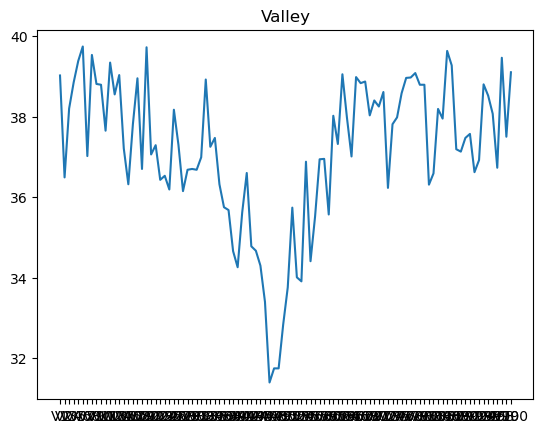

In [14]:
plt.plot(x.iloc[0,:])
plt.title('Valley');

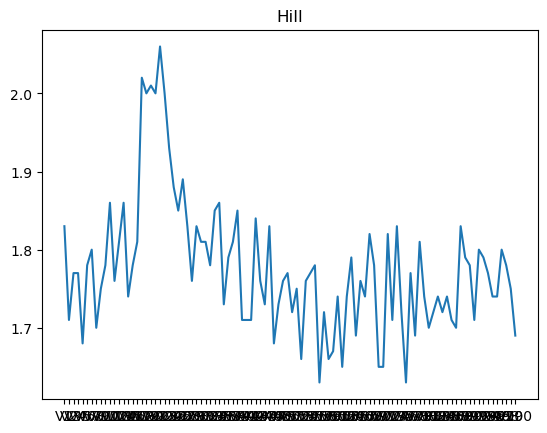

In [15]:
plt.plot(x.iloc[1,:])
plt.title('Hill');

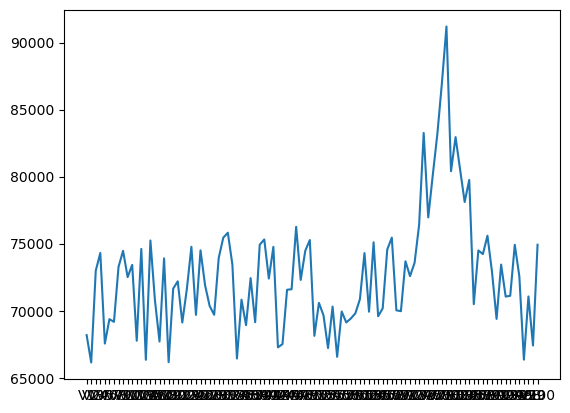

In [16]:
plt.plot(x.iloc[2,:])
plt.show();

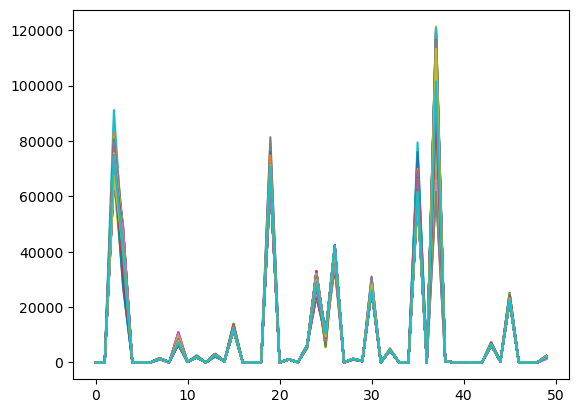

In [17]:
plt.plot(x.iloc[0:50,:])
plt.show();

In [44]:
x = df[df['Class'] == 0]
x.shape

(606, 101)

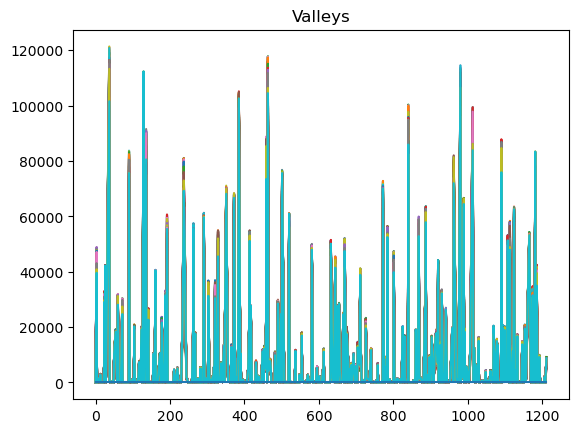

In [45]:
plt.plot(x)
plt.title('Valleys')
plt.show();

In [46]:
m = df[df['Class'] == 1]

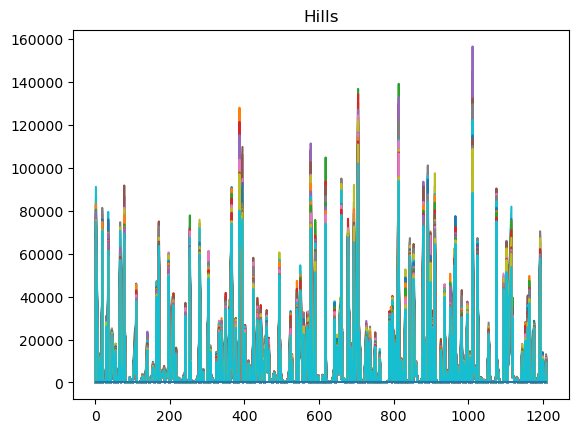

In [47]:
plt.plot(m)
plt.title('Hills')
plt.show();

# Get X Variables Standardized

In [18]:
from sklearn.preprocessing import StandardScaler # for preprocessing the data

In [19]:
ss = StandardScaler()

In [20]:
x = ss.fit_transform(x)

In [21]:
x.shape

(1212, 100)

## **Train Test Split**

In [22]:
from sklearn.model_selection import train_test_split # for training and testing the data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, stratify=y, random_state=2529)

In [24]:
x_train.shape, x_test.shape

((848, 100), (364, 100))

In [25]:
y_train.shape, y_test.shape

((848,), (364,))

## **Get Model Train**

In [27]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(x_train, y_train)

LogisticRegression()

## **Prediction**

In [31]:
y_pred = model.predict(x_test)

In [32]:
y_pred.shape

(364,)

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,

# Accuracy

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.63      0.99      0.77       182\n           1       0.99      0.42      0.59       182\n\n    accuracy                           0.71       364\n   macro avg       0.81      0.71      0.68       364\nweighted avg       0.81      0.71      0.68       364\n'

In [36]:
confusion_matrix(y_test, y_pred)

array([[181,   1],
       [106,  76]], dtype=int64)

## **Explaination**